<a href="https://www.kaggle.com/code/ujjwalchowdhury/energy-efficiency-dataset?scriptVersionId=96178565" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 0. Understanding the Problem

## 0.1 Motivation:

#### When it comes to efficient building design, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. In order to estimate the required cooling and heating capacities, architects and building desioners need information about the characteristics of the building and of the conditioned space (for example occupancy and activity level). For this reason, we will investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.

## 0.2 Understanding the Data

#### We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

## 0.3 Data Description

### The dataset contains eight attributes (or features) and two responses (or outcomes). The aim is to use the eight features to predict each of the two responses.

### Features:
#### -RelativeCompactness 
#### -SurfaceArea
#### -WallArea 
#### -RoofArea
#### -OverallHeight 
#### -Orientation 
#### -GlazingArea
#### -GlazingAreaDistribution
### Predict:
#### HeatingLoad 
#### CoolingLoad



# 1. Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
from scipy.stats import randint as sp_randint
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from keras.layers import Dense
from keras.models import Sequential
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

# 2. Importing the Dataset

In [3]:
data = pd.read_csv('../input/energy-efficiency-data-set/energy_efficiency_data.csv')

# 3. Data Exlporation

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
# import pandas_profiling 
#pandas_profiling.ProfileReport(data)

<AxesSubplot:>

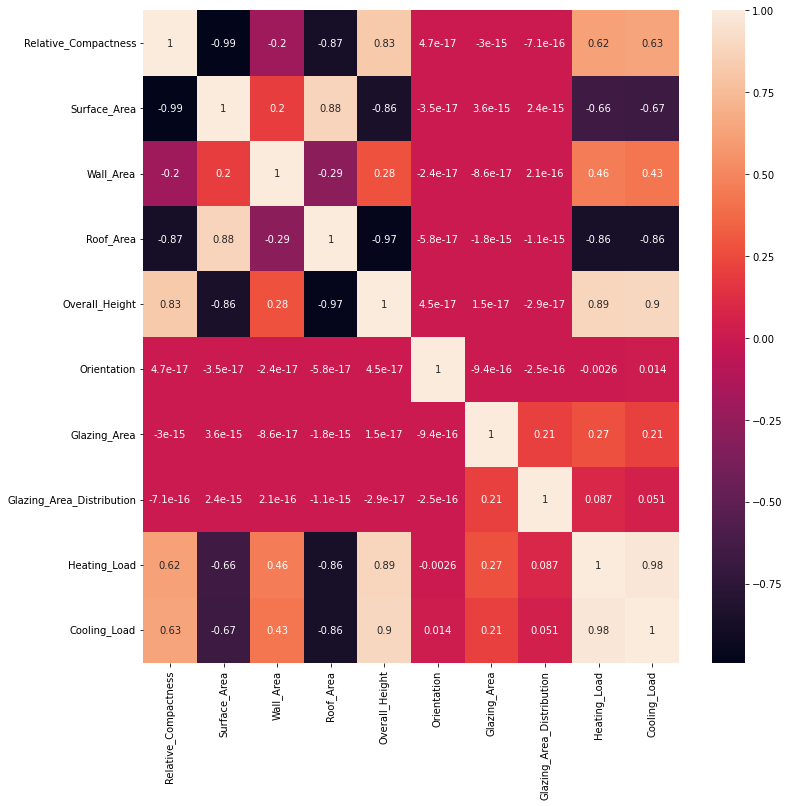

In [6]:
# Preview correlation
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

### Histogram of features

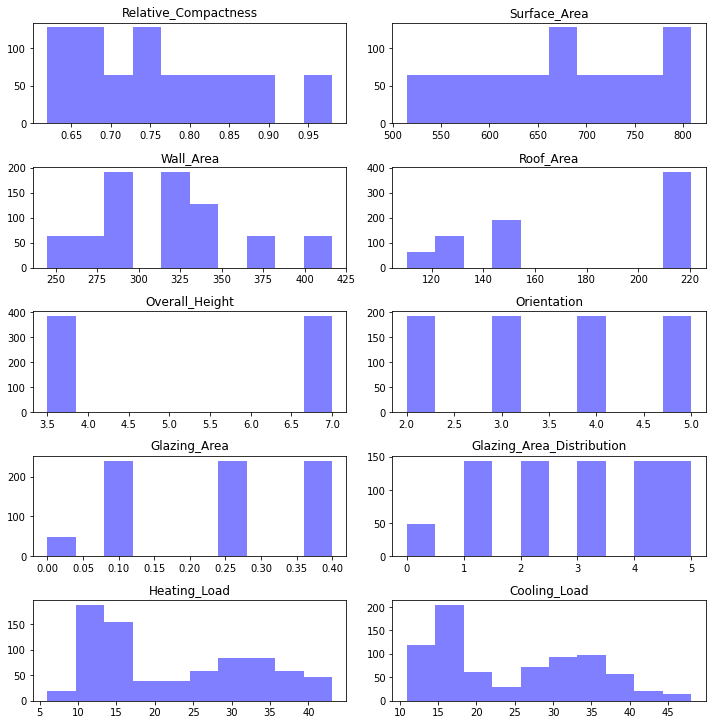

In [7]:
num_list = list(data.columns)

fig = plt.figure(figsize=(10,30))

for i in range(len(num_list)):
    plt.subplot(15,2,i+1)
    plt.title(num_list[i])
    plt.hist(data[num_list[i]],color='blue',alpha=0.5)

plt.tight_layout()

### Pairplot of features

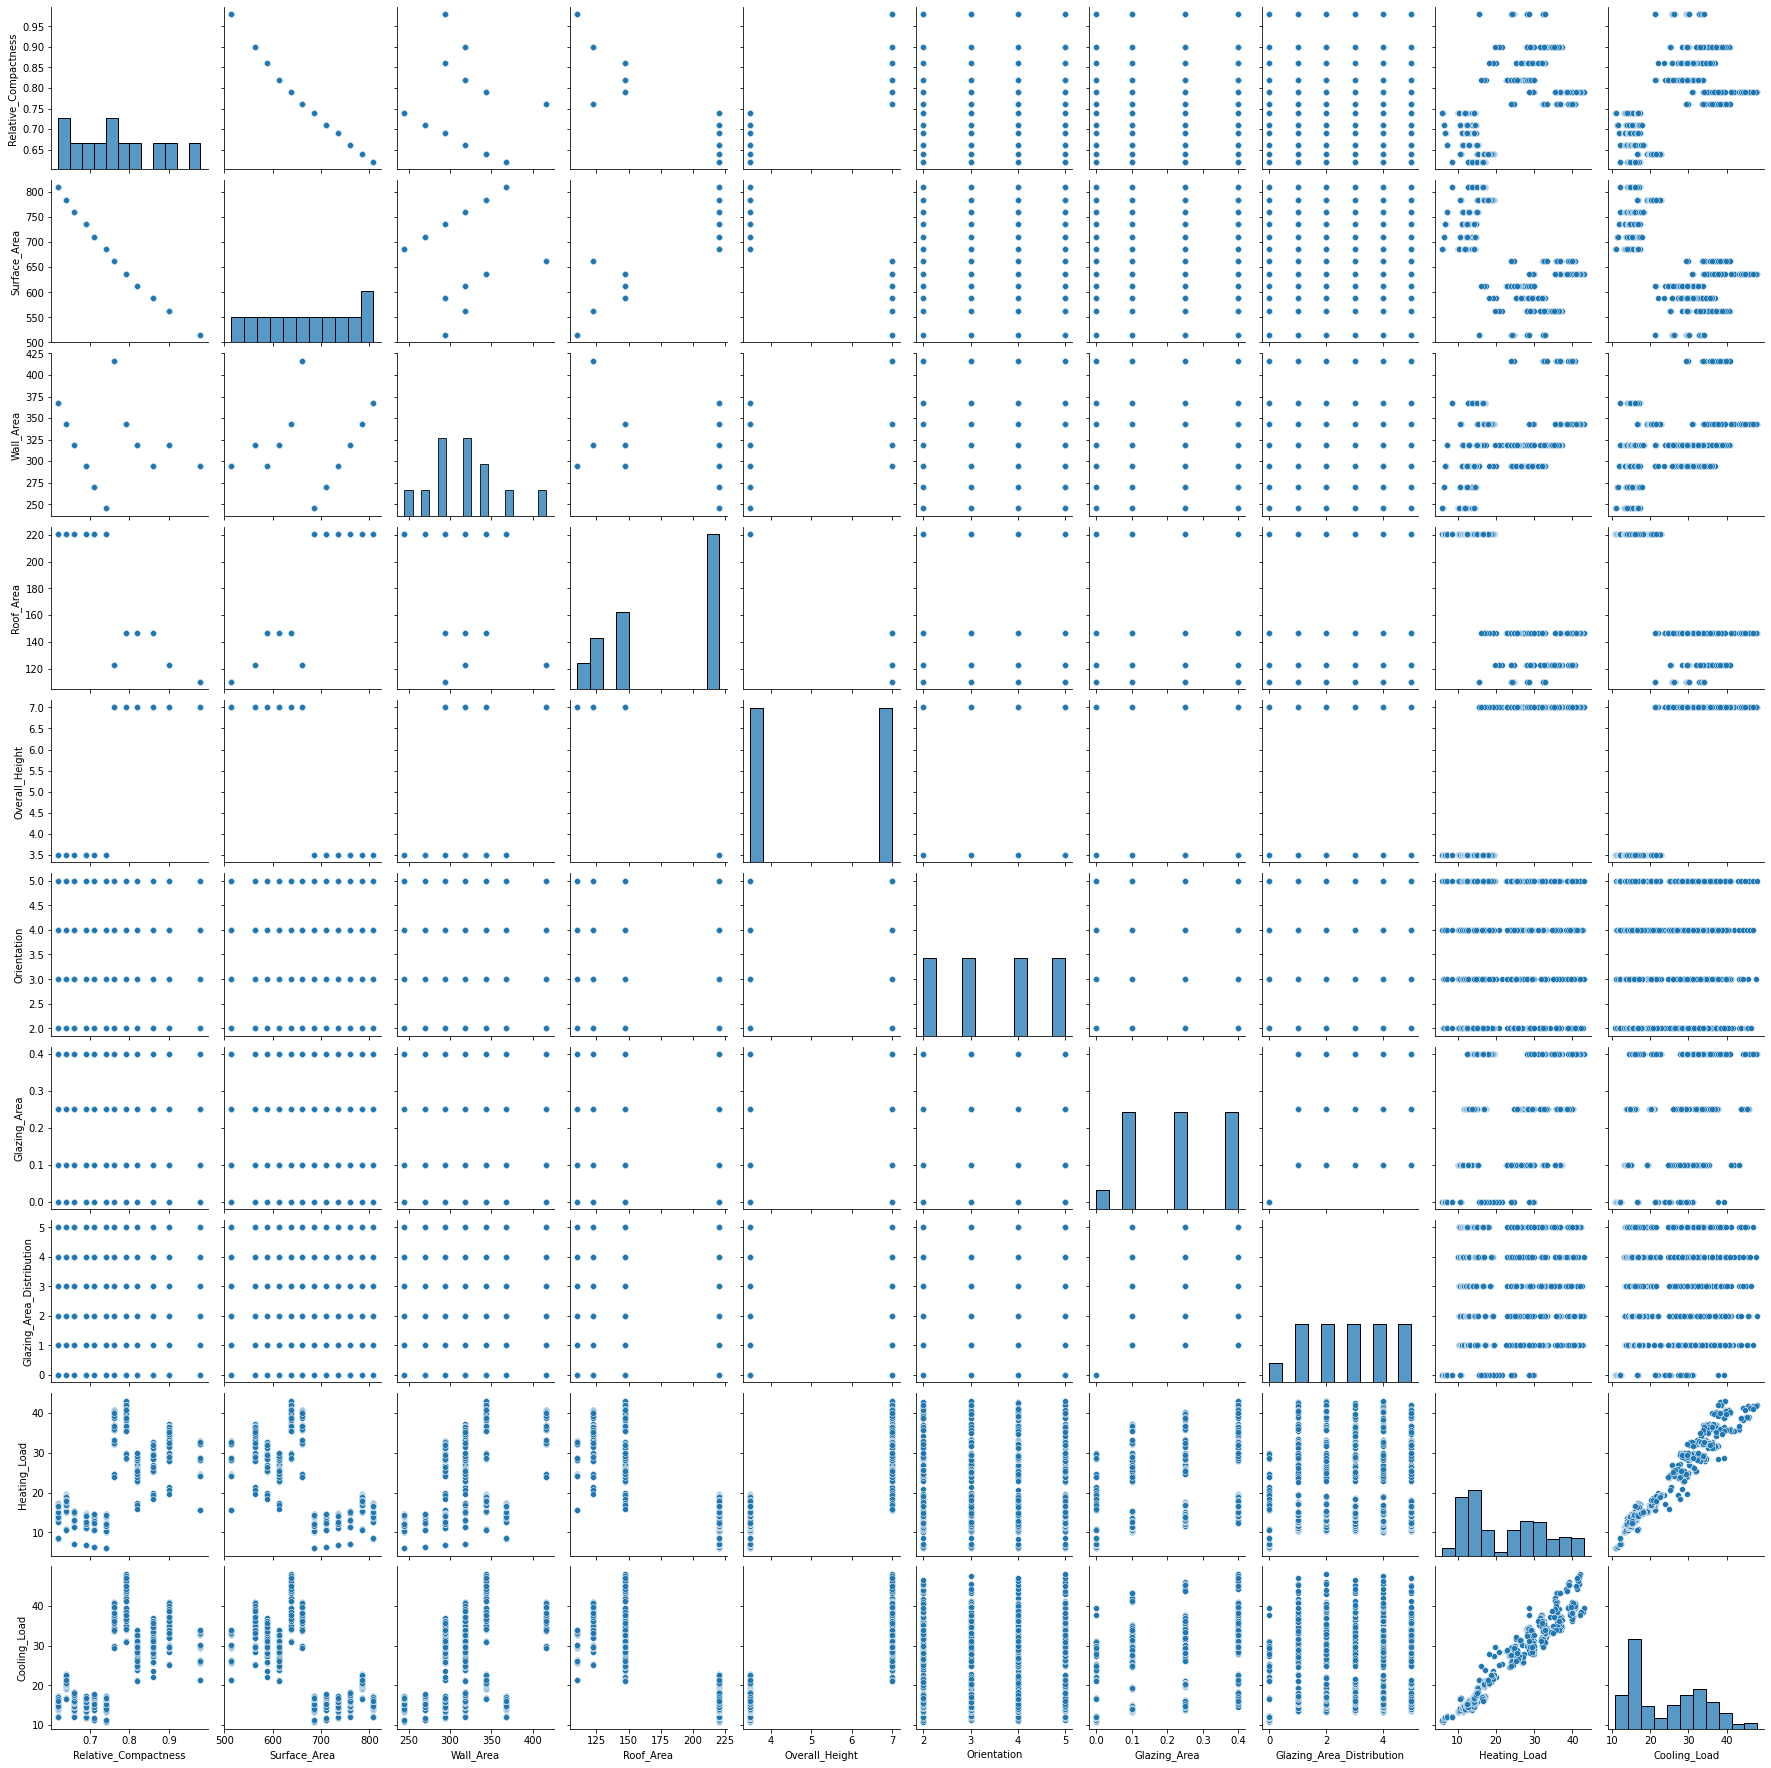

In [8]:
sns.pairplot(data)

# 4. Data Preprocessing

In [9]:
df = data.copy()
#df_2 = data.copy()

In [10]:
X = df[['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
       'Overall_Height', 'Orientation', 'Glazing_Area','Glazing_Area_Distribution']]
y_h = df[['Heating_Load']]
y_c = df[['Cooling_Load']]

## 4.1 Normalizing

In [11]:
# define standard scaler
mmx_scaler = MinMaxScaler()
# transform data
X_normalized = mmx_scaler.fit_transform(X)

# 5. Model Fitting

## 5.1 Train Test Split

In [12]:
X_train, X_test, yh_train, yh_test, yc_train, yc_test = train_test_split(X_normalized,y_h,y_c, 
                                                                         test_size=0.33, random_state = 42)

In [13]:
Acc = pd.DataFrame(index=None, 
                   columns=['model','train_Heating','test_Heating','train_Cooling','test_Cooling'])

In [14]:
regressors = [['SVR',SVR()],
              ['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['KNeighborsRegressor', KNeighborsRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['GradientBoostingRegressor',GradientBoostingRegressor()]]


In [15]:
for mod in regressors:
    name = mod[0]
    model = mod[1]
    
    model.fit(X_train,yh_train)
    actr1 = r2_score(yh_train, model.predict(X_train))
    acte1 = r2_score(yh_test, model.predict(X_test))
    
    model.fit(X_train,yc_train)
    actr2 = r2_score(yc_train, model.predict(X_train))
    acte2 = r2_score(yc_test, model.predict(X_test))
    
    Acc = Acc.append(pd.Series({'model':name, 'train_Heating':actr1,'test_Heating':acte1,'train_Cooling':actr2,'test_Cooling':acte2}),ignore_index=True )
Acc.sort_values(by='test_Cooling')

,model,train_Heating,test_Heating,train_Cooling,test_Cooling
4,MLPRegressor,0.878549,0.873376,0.835636,0.833454
0,SVR,0.925069,0.918868,0.891179,0.883210
2,KNeighborsRegressor,0.945723,0.915916,0.928036,0.900107
5,AdaBoostRegressor,0.965441,0.960967,0.950761,0.948244
1,DecisionTreeRegressor,1.000000,0.996544,1.000000,0.963035
3,RandomForestRegressor,0.999643,0.997652,0.995088,0.972481
6,GradientBoostingRegressor,0.998356,0.997678,0.981346,0.977543
